In [189]:
### Load EDA pkgs
import pandas as pd
import numpy as np

### Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

### Feature selection
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
## Model pkgs
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import cv
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [192]:
hcc_o = pd.read_csv ('./csv/MI.csv')
df = hcc_o
df.head()

1     2  3    4    5    6    7    8    9   10  ...  115  116  117  118  \
0  1  77.0  1  2.0  1.0  1.0  2.0  NaN  3.0  0.0  ...    0    0    0    0   
1  2  55.0  1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0    0    0    0   
2  3  52.0  1  0.0  0.0  0.0  2.0  NaN  2.0  0.0  ...    0    0    0    0   
3  4  68.0  0  0.0  0.0  0.0  2.0  NaN  2.0  0.0  ...    0    0    0    0   
4  5  60.0  1  0.0  0.0  0.0  2.0  NaN  3.0  0.0  ...    0    0    0    0   

   119  120  121  122  123  124  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    1    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 124 columns]

In [193]:
import pandas as pd
data =df
# 统计缺失值数量
missing=data.isnull().sum().reset_index().rename(columns={0:'missNum'})
# 计算缺失比例
missing['missRate']=missing['missNum']/data.shape[0]
# 按照缺失率排序显示
miss_analy=missing[missing.missRate>0].sort_values(by='missRate',ascending=False)
# miss_analy 存储的是每个变量缺失情况的数据框
miss_analy.head(10)

index  missNum  missRate
88    89     1696  0.997647
7      8     1628  0.957647
35    36     1076  0.632941
34    35     1076  0.632941
96    97      686  0.403529
97    98      677  0.398235
95    96      657  0.386471
84    85      375  0.220588
85    86      375  0.220588
83    84      371  0.218235

In [194]:
miss_analy_10_limit = miss_analy[:10]
miss_analy_10_limit

index  missNum  missRate
88    89     1696  0.997647
7      8     1628  0.957647
35    36     1076  0.632941
34    35     1076  0.632941
96    97      686  0.403529
97    98      677  0.398235
95    96      657  0.386471
84    85      375  0.220588
85    86      375  0.220588
83    84      371  0.218235

In [195]:
# 各变量中缺失值的数量
df.isnull().sum(axis = 0)

1        0
2        8
3        0
4        4
5      106
      ... 
120      0
121      0
122      0
123      0
124      0
Length: 124, dtype: int64

In [196]:
df.isnull().sum()

1        0
2        8
3        0
4        4
5      106
      ... 
120      0
121      0
122      0
123      0
124      0
Length: 124, dtype: int64

In [197]:
# 各变量中缺失值的比例
df.isnull().sum(axis = 0)/df.shape[0]*100

1      0.000000
2      0.470588
3      0.000000
4      0.235294
5      6.235294
         ...   
120    0.000000
121    0.000000
122    0.000000
123    0.000000
124    0.000000
Length: 124, dtype: float64

In [198]:
#先進行數據預處理將缺失嚴重與不重要的部分進行刪除column
# 统计缺失值数量
missing=df.isnull().sum().reset_index().rename(columns={0:'missNum'})
# 计算缺失比例
missing['missRate']=missing['missNum']/df.shape[0]
# 按照缺失率排序显示
miss_analy=missing[missing.missRate>0].sort_values(by='missRate',ascending=False)
miss_analy_10_limit = miss_analy[:5]
# miss_analy 存储的是每个变量缺失情况的数据框
miss_analy_10_limit = miss_analy_10_limit.set_axis(['KFK_BLOOD','IBS_NASL','D_AD_KBRIG','S_AD_KBRIG','NOT_NA_KB'], axis='index')
#miss_analy_10_limit.columns=['KFK_BLOOD','IBS_NASL','D_AD_KBRIG','S_AD_KBRIG','NOT_NA_KB','LID_KB','NA_KB','GIPER_Na']
miss_analy_10_limit.drop(labels = 'index', axis = 1, inplace=True)
miss_analy_10_limit['index'] = miss_analy_10_limit.index
miss_analy_10_limit.head()
  


missNum  missRate       index
KFK_BLOOD      1696  0.997647   KFK_BLOOD
IBS_NASL       1628  0.957647    IBS_NASL
D_AD_KBRIG     1076  0.632941  D_AD_KBRIG
S_AD_KBRIG     1076  0.632941  S_AD_KBRIG
NOT_NA_KB       686  0.403529   NOT_NA_KB

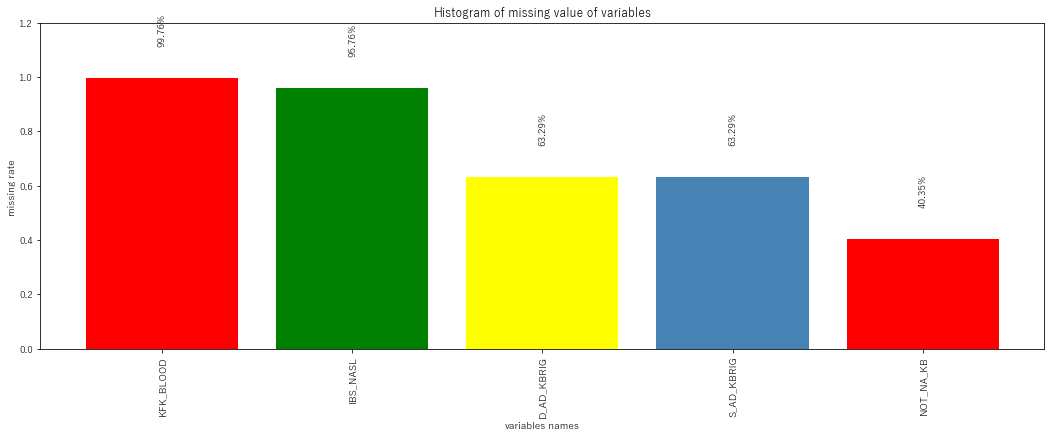

In [199]:
                           
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

plt.rcParams['font.sans-serif']=['simhei']
plt.rcParams['font.family']='Yu Gothic' 
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(18,6))
plt.bar(np.arange(miss_analy_10_limit.shape[0]), list(miss_analy_10_limit.missRate.values), align = 'center'
    ,color=['red','green','yellow','steelblue'])

plt.title('Histogram of missing value of variables')
plt.xlabel('variables names')
plt.ylabel('missing rate')
# 添加x轴标签，并旋转90度
plt.xticks(np.arange(miss_analy_10_limit.shape[0]),list(miss_analy_10_limit['index']))
pl.xticks(rotation=90)
# 添加数值显示
for x,y in enumerate(list(miss_analy_10_limit.missRate.values)):
    plt.text(x,y+0.12,'{:.2%}'.format(y),ha='center',rotation=90)    
plt.ylim([0,1.2])
    
plt.show()

In [200]:
fig.savefig('./csv/pic/original_lostfeature.png')

In [201]:
missing=df.isnull()
corr_matrix = missing.corr()
corr_matrix

1         2   3         4         5         6         7         8  \
1   NaN       NaN NaN       NaN       NaN       NaN       NaN       NaN   
2   NaN  1.000000 NaN -0.003339 -0.017732 -0.014565 -0.012093  0.014461   
3   NaN       NaN NaN       NaN       NaN       NaN       NaN       NaN   
4   NaN -0.003339 NaN  1.000000  0.188325  0.229271  0.204976  0.010213   
5   NaN -0.017732 NaN  0.188325  1.000000  0.737405  0.468053  0.030072   
..   ..       ...  ..       ...       ...       ...       ...       ...   
120 NaN       NaN NaN       NaN       NaN       NaN       NaN       NaN   
121 NaN       NaN NaN       NaN       NaN       NaN       NaN       NaN   
122 NaN       NaN NaN       NaN       NaN       NaN       NaN       NaN   
123 NaN       NaN NaN       NaN       NaN       NaN       NaN       NaN   
124 NaN       NaN NaN       NaN       NaN       NaN       NaN       NaN   

            9        10  ...  115  116  117  118  119  120  121  122  123  124  
1         NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2   -0.005016 -0.004728  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4    0.331070  0.351467  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5    0.182332  0.160005  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
..        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
120       NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
121       NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
122       NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
123       NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
124       NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[124 rows x 124 columns]

In [202]:
# 刪除欄位，例如刪除缺失率非常高的edu變數
#
df.drop(labels = '1', axis = 1, inplace=True)
df.drop(labels = '89', axis = 1, inplace=True)
df.drop(labels = '8', axis = 1, inplace=True)
df.drop(labels = '36', axis = 1, inplace=True)
df.drop(labels = '35', axis = 1, inplace=True)
df.drop(labels = '97', axis = 1, inplace=True)
df.drop(labels = '98', axis = 1, inplace=True)
df.drop(labels = '96', axis = 1, inplace=True)

In [203]:
df

2  3    4    5    6    7    9   10   11   12  ...  115  116  117  \
0     77.0  1  2.0  1.0  1.0  2.0  3.0  0.0  7.0  0.0  ...    0    0    0   
1     55.0  1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0    0    0   
2     52.0  1  0.0  0.0  0.0  2.0  2.0  0.0  2.0  0.0  ...    0    0    0   
3     68.0  0  0.0  0.0  0.0  2.0  2.0  0.0  3.0  1.0  ...    0    0    0   
4     60.0  1  0.0  0.0  0.0  2.0  3.0  0.0  7.0  0.0  ...    0    0    0   
...    ... ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1695  77.0  0  0.0  4.0  2.0  1.0  2.0  0.0  7.0  0.0  ...    0    0    1   
1696  70.0  0  0.0  6.0  2.0  1.0  2.0  0.0  7.0  0.0  ...    0    0    0   
1697  55.0  1  3.0  6.0  2.0  2.0  0.0  0.0  0.0  0.0  ...    0    0    0   
1698  79.0  0  2.0  2.0  2.0  1.0  2.0  0.0  7.0  NaN  ...    0    0    0   
1699  63.0  1  2.0  NaN  NaN  NaN  2.0  0.0  NaN  4.0  ...    0    0    0   

      118  119  120  121  122  123  124  
0       0    0    0    0    0    0    0  
1       0    0    0    0    0    0    0  
2       0    0    0    0    0    0    0  
3       0    0    0    1    0    0    0  
4       0    0    0    0    0    0    0  
...   ...  ...  ...  ...  ...  ...  ...  
1695    0    1    0    0    0    0    3  
1696    0    0    0    0    0    0    1  
1697    0    0    0    0    1    0    6  
1698    1    0    0    0    0    0    1  
1699    0    0    0    0    0    0    1  

[1700 rows x 116 columns]

In [209]:
import miceforest as mf
# Introduce missing values
df_amp = df
#df_amp = mf.ampute_data(df,perc=0.25,random_state=1991)

In [210]:
kernel = mf.MultipleImputedKernel(
  df_amp,
  datasets=4,
  save_all_iterations=True,
  random_state=1991
)

In [211]:
new_data = df_amp.iloc[range(15)]

In [212]:
new_data_imputed = kernel.impute_new_data(new_data=new_data)
print(new_data_imputed)

              Class: MultipleImputedDataSet
           Datasets: 4
         Iterations: 0
  Imputed Variables: 12
save_all_iterations: False


invalid value encountered in true_divide
invalid value encountered in true_divide
Degrees of freedom <= 0 for slice
divide by zero encountered in true_divide
invalid value encountered in multiply


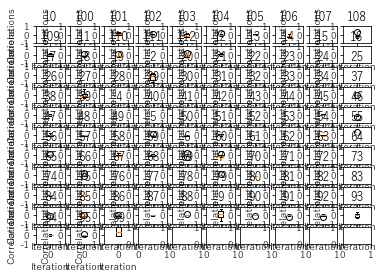

In [217]:
kernel.plot_correlations()

In [ ]:
df.columns

In [ ]:
#先進行數據預處理將缺失嚴重與不重要的部分進行刪除column
# 统计缺失值数量
missing=df.isnull().sum().reset_index().rename(columns={0:'missNum'})
# 计算缺失比例
missing['missRate']=missing['missNum']/df.shape[0]
# 按照缺失率排序显示
miss_analy=missing[missing.missRate>0].sort_values(by='missRate',ascending=False)
# miss_analy 存储的是每个变量缺失情况的数据框

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

plt.rcParams['font.sans-serif']=['simhei']
plt.rcParams['font.family']='Yu Gothic' 
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(18,6))
plt.bar(np.arange(miss_analy.shape[0]), list(miss_analy.missRate.values), align = 'center'
    ,color=['red','green','yellow','steelblue'])

plt.title('Histogram of missing value of variables')
plt.xlabel('variables names')
plt.ylabel('missing rate')
# 添加x轴标签，并旋转90度
plt.xticks(np.arange(miss_analy.shape[0]),list(miss_analy['index']))
pl.xticks(rotation=90)
# 添加数值显示
for x,y in enumerate(list(miss_analy.missRate.values)):
    plt.text(x,y+0.12,'{:.2%}'.format(y),ha='center',rotation=90)    
plt.ylim([0,0.4])
    
plt.show()


In [ ]:
fig.savefig('./csv/pic/lostfeature.png')

In [ ]:
# 替換法處理缺失值
df.fillna(value = {
    '3': df['3'].mode()[0], # 使用性別的眾數替換缺失性別
    '4': df['4'].mode()[0], # 使用性別的眾數替換缺失性別 
    '5': df['5'].mode()[0], # 使用性別的眾數替換缺失性別     
    '6': df['6'].mode()[0], # 使用性別的眾數替換缺失性別
    '7': df['7'].mode()[0], # 使用性別的眾數替換缺失性別      
    '9': df['9'].mode()[0], # 使用性別的眾數替換缺失性別
    '10': df['10'].mode()[0], # 使用性別的眾數替換缺失性別 
    '11': df['11'].mode()[0], # 使用性別的眾數替換缺失性別     
    '12': df['12'].mode()[0], # 使用性別的眾數替換缺失性別
    '13': df['13'].mode()[0], # 使用性別的眾數替換缺失性別 
    '14': df['14'].mode()[0], # 使用性別的眾數替換缺失性別   
    '15': df['15'].mode()[0], # 使用性別的眾數替換缺失性別
    '16': df['16'].mode()[0], # 使用性別的眾數替換缺失性別 
    '17': df['17'].mode()[0], # 使用性別的眾數替換缺失性別     
    '18': df['18'].mode()[0], # 使用性別的眾數替換缺失性別
    '19': df['19'].mode()[0], # 使用性別的眾數替換缺失性別 
    '20': df['20'].mode()[0], # 使用性別的眾數替換缺失性別  
    '21': df['21'].mode()[0], # 使用性別的眾數替換缺失性別     
    '22': df['22'].mode()[0], # 使用性別的眾數替換缺失性別
    '23': df['23'].mode()[0], # 使用性別的眾數替換缺失性別 
    '24': df['24'].mode()[0], # 使用性別的眾數替換缺失性別   
    '25': df['25'].mode()[0], # 使用性別的眾數替換缺失性別
    '26': df['26'].mode()[0], # 使用性別的眾數替換缺失性別 
    '27': df['27'].mode()[0], # 使用性別的眾數替換缺失性別     
    '28': df['28'].mode()[0], # 使用性別的眾數替換缺失性別
    '29': df['29'].mode()[0], # 使用性別的眾數替換缺失性別 
    '30': df['30'].mode()[0], # 使用性別的眾數替換缺失性別 
    '31': df['31'].mode()[0], # 使用性別的眾數替換缺失性別     
    '32': df['32'].mode()[0], # 使用性別的眾數替換缺失性別
    '33': df['33'].mode()[0], # 使用性別的眾數替換缺失性別 
    '34': df['34'].mode()[0], # 使用性別的眾數替換缺失性別   
    '39': df['39'].mode()[0], # 使用性別的眾數替換缺失性別 
    '40': df['40'].mode()[0], # 使用性別的眾數替換缺失性別  
    '41': df['41'].mode()[0], # 使用性別的眾數替換缺失性別     
    '42': df['42'].mode()[0], # 使用性別的眾數替換缺失性別
    '43': df['43'].mode()[0], # 使用性別的眾數替換缺失性別 
    '44': df['44'].mode()[0], # 使用性別的眾數替換缺失性別   
    '45': df['45'].mode()[0], # 使用性別的眾數替換缺失性別
    '46': df['46'].mode()[0], # 使用性別的眾數替換缺失性別 
    '47': df['47'].mode()[0], # 使用性別的眾數替換缺失性別     
    '48': df['48'].mode()[0], # 使用性別的眾數替換缺失性別
    '49': df['49'].mode()[0], # 使用性別的眾數替換缺失性別 
    '50': df['50'].mode()[0], # 使用性別的眾數替換缺失性別 
    '51': df['51'].mode()[0], # 使用性別的眾數替換缺失性別     
    '52': df['52'].mode()[0], # 使用性別的眾數替換缺失性別
    '53': df['53'].mode()[0], # 使用性別的眾數替換缺失性別 
    '54': df['54'].mode()[0], # 使用性別的眾數替換缺失性別   
    '55': df['55'].mode()[0], # 使用性別的眾數替換缺失性別
    '56': df['56'].mode()[0], # 使用性別的眾數替換缺失性別 
    '57': df['57'].mode()[0], # 使用性別的眾數替換缺失性別     
    '58': df['58'].mode()[0], # 使用性別的眾數替換缺失性別
    '59': df['59'].mode()[0], # 使用性別的眾數替換缺失性別 
    '60': df['60'].mode()[0], # 使用性別的眾數替換缺失性別  
    '61': df['61'].mode()[0], # 使用性別的眾數替換缺失性別     
    '62': df['62'].mode()[0], # 使用性別的眾數替換缺失性別
    '63': df['63'].mode()[0], # 使用性別的眾數替換缺失性別 
    '64': df['64'].mode()[0], # 使用性別的眾數替換缺失性別   
    '65': df['65'].mode()[0], # 使用性別的眾數替換缺失性別
    '66': df['66'].mode()[0], # 使用性別的眾數替換缺失性別 
    '67': df['67'].mode()[0], # 使用性別的眾數替換缺失性別     
    '68': df['68'].mode()[0], # 使用性別的眾數替換缺失性別
    '69': df['69'].mode()[0], # 使用性別的眾數替換缺失性別 
    '70': df['70'].mode()[0], # 使用性別的眾數替換缺失性別 
    '71': df['71'].mode()[0], # 使用性別的眾數替換缺失性別     
    '72': df['72'].mode()[0], # 使用性別的眾數替換缺失性別
    '73': df['73'].mode()[0], # 使用性別的眾數替換缺失性別 
    '74': df['74'].mode()[0], # 使用性別的眾數替換缺失性別   
    '75': df['75'].mode()[0], # 使用性別的眾數替換缺失性別
    '76': df['76'].mode()[0], # 使用性別的眾數替換缺失性別 
    '77': df['77'].mode()[0], # 使用性別的眾數替換缺失性別     
    '78': df['78'].mode()[0], # 使用性別的眾數替換缺失性別
    '79': df['79'].mode()[0], # 使用性別的眾數替換缺失性別 
    '80': df['80'].mode()[0], # 使用性別的眾數替換缺失性別  
    '81': df['81'].mode()[0], # 使用性別的眾數替換缺失性別     
    '82': df['82'].mode()[0], # 使用性別的眾數替換缺失性別
    '83': df['83'].mode()[0], # 使用性別的眾數替換缺失性別 
    '85': df['85'].mode()[0], # 使用性別的眾數替換缺失性別    
    '92': df['92'].mode()[0], # 使用性別的眾數替換缺失性別
    '93': df['93'].mode()[0], # 使用性別的眾數替換缺失性別 
    '94': df['94'].mode()[0], # 使用性別的眾數替換缺失性別   
    '95': df['95'].mode()[0], # 使用性別的眾數替換缺失性別
    '99': df['99'].mode()[0], # 使用性別的眾數替換缺失性別 
    '100': df['100'].mode()[0], # 使用性別的眾數替換缺失性別 
    '101': df['101'].mode()[0], # 使用性別的眾數替換缺失性別     
    '102': df['102'].mode()[0], # 使用性別的眾數替換缺失性別
    '103': df['103'].mode()[0], # 使用性別的眾數替換缺失性別 
    '104': df['104'].mode()[0], # 使用性別的眾數替換缺失性別   
    '105': df['105'].mode()[0], # 使用性別的眾數替換缺失性別
    '106': df['106'].mode()[0], # 使用性別的眾數替換缺失性別 
    '107': df['107'].mode()[0], # 使用性別的眾數替換缺失性別     
    '108': df['108'].mode()[0], # 使用性別的眾數替換缺失性別
    '109': df['109'].mode()[0], # 使用性別的眾數替換缺失性別 
    '110': df['110'].mode()[0], # 使用性別的眾數替換缺失性別  
    '111': df['111'].mode()[0], # 使用性別的眾數替換缺失性別     
    '112': df['112'].mode()[0], # 使用性別的眾數替換缺失性別
    '113': df['113'].mode()[0], # 使用性別的眾數替換缺失性別 
    '114': df['114'].mode()[0], # 使用性別的眾數替換缺失性別   
    '115': df['115'].mode()[0], # 使用性別的眾數替換缺失性別
    '116': df['116'].mode()[0], # 使用性別的眾數替換缺失性別 
    '117': df['117'].mode()[0], # 使用性別的眾數替換缺失性別     
    '118': df['118'].mode()[0], # 使用性別的眾數替換缺失性別
    '119': df['119'].mode()[0], # 使用性別的眾數替換缺失性別 
    '120': df['120'].mode()[0], # 使用性別的眾數替換缺失性別 
    '121': df['121'].mode()[0], # 使用性別的眾數替換缺失性別     
    '122': df['122'].mode()[0], # 使用性別的眾數替換缺失性別
    '123': df['123'].mode()[0], # 使用性別的眾數替換缺失性別 
    '124': df['124'].mode()[0], # 使用性別的眾數替換缺失性別   
    
    '2':df['2'].mean(), # 使用年齡的平均值替換缺失年齡
    '37':df['37'].mean(), # 使用年齡的平均值替換缺失年齡
    '38':df['38'].mean(), # 使用年齡的平均值替換缺失年齡
    '84':df['84'].mean(), # 使用年齡的平均值替換缺失年齡
    '86':df['86'].mean(), # 使用年齡的平均值替換缺失年齡
    '87':df['87'].mean(), # 使用年齡的平均值替換缺失年齡
    '88':df['88'].mean(), # 使用年齡的平均值替換缺失年齡
    '90':df['90'].mean(), # 使用年齡的平均值替換缺失年齡
    '91':df['91'].mean(), # 使用年齡的平均值替換缺失年齡       
}, inplace = True )

In [ ]:
# 各变量中缺失值的数量
df.isnull().sum(axis = 0)

In [ ]:
df.info()

In [19]:
df.describe()

2            3            4            5            6  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean     61.856974     0.626471     0.553529     2.171765     1.239412   
std      11.233395     0.483883     0.836248     2.428718     1.030883   
min      26.000000     0.000000     0.000000     0.000000     0.000000   
25%      54.000000     0.000000     0.000000     0.000000     0.000000   
50%      63.000000     1.000000     0.000000     1.000000     2.000000   
75%      70.000000     1.000000     1.000000     5.000000     2.000000   
max      92.000000     1.000000     3.000000     6.000000     4.000000   

                 7            9           10           11           12  ...  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000  ...   
mean      1.185882     1.396471     0.033529     2.852941     0.188235  ...   
std       0.802168     1.086809     0.180067     3.096946     0.649065  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       1.000000     2.000000     0.000000     1.000000     0.000000  ...   
75%       2.000000     2.000000     0.000000     7.000000     0.000000  ...   
max       2.000000     3.000000     1.000000     7.000000     4.000000  ...   

               115          116          117          118          119  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean      0.024706     0.041765     0.033529     0.093529     0.031765   
std       0.155273     0.200110     0.180067     0.291259     0.175425   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               120          121          122          123          124  
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000  
mean      0.044118     0.231765     0.093529     0.087059     0.477059  
std       0.205417     0.422084     0.291259     0.282004     1.381818  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     7.000000  

[8 rows x 116 columns]

In [20]:
df.to_csv("./csv/spaerate_result.csv",index=0)

In [21]:
#切分資料集
from sklearn.model_selection import train_test_split
from sklearn import metrics
from  sklearn.datasets  import  make_hastie_10_2
from xgboost.sklearn import XGBClassifier
y = df['124']
df.drop(labels = '124', axis = 1, inplace=True)
X = df
X

2  3    4    5    6    7    9   10   11   12  ...  114  115  116  \
0     77.0  1  2.0  1.0  1.0  2.0  3.0  0.0  7.0  0.0  ...    0    0    0   
1     55.0  1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0    0    0   
2     52.0  1  0.0  0.0  0.0  2.0  2.0  0.0  2.0  0.0  ...    0    0    0   
3     68.0  0  0.0  0.0  0.0  2.0  2.0  0.0  3.0  1.0  ...    0    0    0   
4     60.0  1  0.0  0.0  0.0  2.0  3.0  0.0  7.0  0.0  ...    0    0    0   
...    ... ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1695  77.0  0  0.0  4.0  2.0  1.0  2.0  0.0  7.0  0.0  ...    0    0    0   
1696  70.0  0  0.0  6.0  2.0  1.0  2.0  0.0  7.0  0.0  ...    0    0    0   
1697  55.0  1  3.0  6.0  2.0  2.0  0.0  0.0  0.0  0.0  ...    0    0    0   
1698  79.0  0  2.0  2.0  2.0  1.0  2.0  0.0  7.0  0.0  ...    0    0    0   
1699  63.0  1  2.0  0.0  2.0  2.0  2.0  0.0  0.0  4.0  ...    0    0    0   

      117  118  119  120  121  122  123  
0       0    0    0    0    0    0    0  
1       0    0    0    0    0    0    0  
2       0    0    0    0    0    0    0  
3       0    0    0    0    1    0    0  
4       0    0    0    0    0    0    0  
...   ...  ...  ...  ...  ...  ...  ...  
1695    1    0    1    0    0    0    0  
1696    0    0    0    0    0    0    0  
1697    0    0    0    0    0    1    0  
1698    0    1    0    0    0    0    0  
1699    0    0    0    0    0    0    0  

[1700 rows x 115 columns]

In [22]:
train_data = np.array(X)#np.ndarray()
#train_data = train_data.tolist()
train_data_y = np.array(y)#np.ndarray()
#train_data_y = train_data_y.tolist()
print(type(train_data))
print(type(train_data_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_data_y, test_size=0.3, random_state=0)

In [24]:
clf = XGBClassifier(
        #樹的個數
        n_estimators=15,
        # 如同學習率
        learning_rate= 0.3, 
        # 構建樹的深度，越大越容易過擬合    
        max_depth=15, 
        # 隨機取樣訓練樣本 訓練例項的子取樣比
        subsample=1, 
        # 用於控制是否後剪枝的引數,越大越保守，一般0.1、0.2這樣子
        gamma=0, 
        # 控制模型複雜度的權重值的L2正則化項引數，引數越大，模型越不容易過擬合。
        reg_lambda=1,  
        
        #最大增量步長，我們允許每個樹的權重估計。
        max_delta_step=0,
        # 生成樹時進行的列取樣 
        colsample_bytree=1, 

        # 這個引數預設是 1，是每個葉子裡面 h 的和至少是多少，對正負樣本不均衡時的 0-1 分類而言
        # 假設 h 在 0.01 附近，min_child_weight 為 1 意味著葉子節點中最少需要包含 100 個樣本。
        #這個引數非常影響結果，控制葉子節點中二階導的和的最小值，該引數值越小，越容易 overfitting。
        min_child_weight=1, 

        #隨機種子
        seed=1000 
        
        # L1 正則項引數
#        reg_alpha=0,
        
        #如果取值大於0的話，在類別樣本不平衡的情況下有助於快速收斂。平衡正負權重
        #scale_pos_weight=1,
        
        #多分類的問題 指定學習任務和相應的學習目標
        #objective= 'multi:softmax', 
        
        # 類別數，多分類與 multisoftmax 並用
        #num_class=10,
        
        # 設定成1則沒有執行資訊輸出，最好是設定為0.是否在執行升級時列印訊息。
#        silent=0 ,
        # cpu 執行緒數 預設最大
#        nthread=4,
    
        #eval_metric= 'auc'
)

# 模型 訓練
clf.fit(X_train,y_train,eval_metric='auc')
# 預測值
y_pred=clf.predict(X_test)
# 真實值 賦值
y_true= y_test

# 計算精度
print("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))

C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy : 0.8902


In [25]:
# 計算精度
y_pred=clf.predict(X_train)# 計算精度
print("Accuracy : %.4g" % metrics.accuracy_score(y_train, y_pred))

Accuracy : 0.9992


In [27]:
X_train,X_val,y_train,y_val = train_test_split(train_data,train_data_y,test_size = 0.33,random_state = 33)

xgb_np = XGBClassifier(n_estimators=100,random_state=100,scale_pos_weight =1)
xgb_np.fit(X_train, y_train)  #因LIME input需要是 array 所以buildxgb時使用.value轉換

print('validation score:%.3f' %xgb_np.score(X_val, y_val) ) # 0.854

C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
validation score:0.909


In [28]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_data_y, test_size=0.3, random_state=0)
def CreateBalancedSampleWeights(y_train, largest_class_weight_coef):
    classes = np.unique(y_train, axis = 0)
    classes.sort()
    class_samples = np.bincount(y_train)
    total_samples = class_samples.sum()
    n_classes = len(class_samples)
    weights = total_samples / (n_classes * class_samples * 1.0)
    class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
    class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * largest_class_weight_coef
    sample_weights = [class_weight_dict[y] for y in y_train]
    return sample_weights

In [29]:
largest_class_weight_coef = max(y.value_counts().values)/df.shape[0]
    
#pass y_train as numpy array
weight = CreateBalancedSampleWeights(y_train, largest_class_weight_coef)

In [30]:
# define data_dmatrix
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import cv
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
data_dmatrix = xgb.DMatrix(data=train_data,label=train_data_y)


In [31]:
### declare parameters
params ={'objective':'binary:logistic',
         'max_depth': 4,
         'alpha': 10,
         'learning_rate' : 1.0,
         'n_estimators':100
         }

In [32]:
# instantiate the classfier
xgb_clf = XGBClassifier(learning_rate =0.001,
n_estimators=1000,
weights = weight,
max_depth=18,
min_child_weight=10,
)

## Training XGBoost to the training set
xgb_clf.fit(X_train,y_train)

### score
xgb_clf.score(X_test,y_test)

[17:34:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8901960784313725

In [33]:
print(list(xgb_clf.predict(X_test)))
print(list(y_test))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 

In [34]:
# making predictions on the test data and confusion matrix
y_pred = xgb_clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Model Accuracy Score:', accuracy_score(y_test,y_pred))

[[426   2   0   0   0   0   0   0]
 [ 19  14   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0]
 [  0   0   0  14   0   0   0   0]
 [  8   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0]
 [  9   1   0   0   0   0   0   0]]
Model Accuracy Score: 0.8901960784313725


In [35]:
### Applying the K-Fold Cross Validation for XGBoost
from xgboost import cv
from sklearn.model_selection import cross_val_score

########
accuracies = cross_val_score(estimator= xgb_clf, X=X_train,y=y_train,cv=10)
print('Accuracy:{:.2f} %'.format(accuracies.mean()*100))
print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))

[17:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:87.65 %
Standard Deviation:1.36 %


In [36]:
# CatBoost
from catboost import CatBoostClassifier
catboost = CatBoostClassifier()
catboost.fit(X_train,y_train)
catboost.score(X_test,y_test)

Learning rate set to 0.079832
0:	learn: 1.7183890	total: 139ms	remaining: 2m 19s
1:	learn: 1.5324546	total: 147ms	remaining: 1m 13s
2:	learn: 1.3880009	total: 156ms	remaining: 51.8s
3:	learn: 1.2554933	total: 164ms	remaining: 40.8s
4:	learn: 1.1614085	total: 172ms	remaining: 34.3s
5:	learn: 1.0812761	total: 181ms	remaining: 29.9s
6:	learn: 1.0158527	total: 190ms	remaining: 26.9s
7:	learn: 0.9495529	total: 198ms	remaining: 24.5s
8:	learn: 0.8983333	total: 206ms	remaining: 22.6s
9:	learn: 0.8514111	total: 214ms	remaining: 21.2s
10:	learn: 0.8090029	total: 222ms	remaining: 20s
11:	learn: 0.7713346	total: 230ms	remaining: 18.9s
12:	learn: 0.7435888	total: 245ms	remaining: 18.6s
13:	learn: 0.7181032	total: 253ms	remaining: 17.8s
14:	learn: 0.6899294	total: 262ms	remaining: 17.2s
15:	learn: 0.6702016	total: 277ms	remaining: 17.1s
16:	learn: 0.6466543	total: 286ms	remaining: 16.5s
17:	learn: 0.6308774	total: 294ms	remaining: 16s
18:	learn: 0.6130723	total: 302ms	remaining: 15.6s
19:	learn: 0.

0.8960784313725491

In [37]:
y_predCat = catboost.predict(X_test)
cm = confusion_matrix(y_test, y_predCat)
print(cm)
accuracy_score(y_test,y_predCat)

[[425   2   0   0   0   1   0   0]
 [ 15  18   0   0   0   0   0   0]
 [  7   1   0   0   0   0   0   0]
 [  0   0   0  14   0   0   0   0]
 [  8   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0   0]
 [  6   1   0   0   0   0   0   0]
 [  9   1   0   0   0   0   0   0]]


0.8960784313725491

In [38]:
import shap
shap.initjs()

In [39]:
## shap_values
explainer = shap.TreeExplainer(xgb_clf,X_train)
shap_values = explainer.shap_values(X_test)

 99%|===================| 4042/4080 [00:36<00:00]        

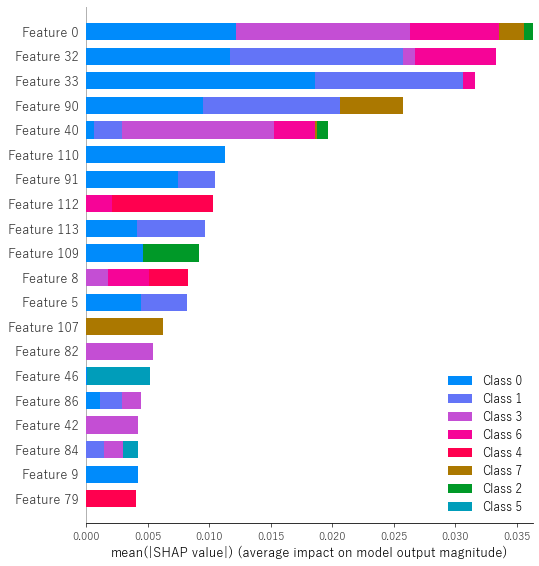

In [40]:
shap.summary_plot(shap_values,X_test)

#### Resampleling imbalanced data
+ There are several ways of resampling imbalanced data to make the model well trained.
  * Random under-sampling
  * Random over-sampling
  * NearMiss

In [41]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_data_y, test_size=0.3, random_state=0)

In [42]:
X_train

array([[63.,  1.,  1., ...,  1.,  1.,  0.],
       [66.,  0.,  0., ...,  0.,  0.,  0.],
       [58.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [87.,  1.,  2., ...,  0.,  1.,  0.],
       [61.,  1.,  1., ...,  0.,  0.,  0.],
       [42.,  1.,  0., ...,  0.,  0.,  0.]])

In [43]:
X_test

array([[63.,  1.,  0., ...,  0.,  0.,  0.],
       [70.,  1.,  1., ...,  1.,  0.,  0.],
       [50.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [59.,  1.,  2., ...,  0.,  0.,  0.],
       [60.,  0.,  1., ...,  0.,  0.,  0.],
       [72.,  0.,  1., ...,  0.,  0.,  0.]])

In [44]:
y_train

array([0, 0, 0, ..., 6, 0, 0], dtype=int64)

In [45]:
y_test

array([0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 3, 1, 0, 0, 0, 0,
       7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 7,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 7, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [46]:
type(X_train)

numpy.ndarray

In [47]:
X_train.shape

(1190, 115)

In [48]:
type(y_train)

numpy.ndarray

In [49]:
y_train.shape

(1190,)

In [50]:
y_train

array([0, 0, 0, ..., 6, 0, 0], dtype=int64)

In [51]:
X_train_s = pd.DataFrame(X_train)

In [52]:
y_train_s = pd.Series(y_train)

In [53]:
Resample_data = pd.concat([X_train_s, y_train_s], axis=1)
Resample_data.shape

(1190, 116)

In [54]:
df

2  3    4    5    6    7    9   10   11   12  ...  114  115  116  \
0     77.0  1  2.0  1.0  1.0  2.0  3.0  0.0  7.0  0.0  ...    0    0    0   
1     55.0  1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0    0    0   
2     52.0  1  0.0  0.0  0.0  2.0  2.0  0.0  2.0  0.0  ...    0    0    0   
3     68.0  0  0.0  0.0  0.0  2.0  2.0  0.0  3.0  1.0  ...    0    0    0   
4     60.0  1  0.0  0.0  0.0  2.0  3.0  0.0  7.0  0.0  ...    0    0    0   
...    ... ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1695  77.0  0  0.0  4.0  2.0  1.0  2.0  0.0  7.0  0.0  ...    0    0    0   
1696  70.0  0  0.0  6.0  2.0  1.0  2.0  0.0  7.0  0.0  ...    0    0    0   
1697  55.0  1  3.0  6.0  2.0  2.0  0.0  0.0  0.0  0.0  ...    0    0    0   
1698  79.0  0  2.0  2.0  2.0  1.0  2.0  0.0  7.0  0.0  ...    0    0    0   
1699  63.0  1  2.0  0.0  2.0  2.0  2.0  0.0  0.0  4.0  ...    0    0    0   

      117  118  119  120  121  122  123  
0       0    0    0    0    0    0    0  
1       0    0    0    0    0    0    0  
2       0    0    0    0    0    0    0  
3       0    0    0    0    1    0    0  
4       0    0    0    0    0    0    0  
...   ...  ...  ...  ...  ...  ...  ...  
1695    1    0    1    0    0    0    0  
1696    0    0    0    0    0    0    0  
1697    0    0    0    0    0    1    0  
1698    0    1    0    0    0    0    0  
1699    0    0    0    0    0    0    0  

[1700 rows x 115 columns]

In [55]:
Resample_data.columns=['年齡','性別','數量的心肌梗塞在病歷','病史中的勞力性心絞痛','上一年心絞痛功能等級','最近幾週（冠心病，冠心病）','存在原發性高血壓','有症狀的高血壓','動脈高血壓的持續時間','病史中存在慢性心力衰竭','觀察回憶中的心律失常','在病歷早產宮縮心房','病史中的室性早搏','病史中房顫的發作','持續形式的房顫（心房顫動）','心室顫動在病歷','病史中的室性陣發性心動過速','既往史中的一級 AV 阻滯','既往史中的三度 AV 阻滯','LBBB（前支）在病歷','病歷中的不完全','病史中的完全','不完全RBBB在病歷','在病歷（NP10）完整RBBB','糖尿病的既往病史','病史中的肥胖','甲狀腺毒症在病歷','在病歷慢性支氣管炎','在病歷31.Obstructive慢性支氣管炎','支氣管哮喘的既往史','慢性肺炎（zab_leg_04）','在既往病史（zab_leg_06）','重症監護室的收縮壓','重症監護室的舒張壓','入住重症監護病房時的肺水腫','入住重症監護病房時的心源性休克','入住重症監護病房時（或在院前階段）房顫發作 (MP_TP_POST)','入住重症監護病房時（或入院前階段）室上性心動過速的發作 (SVT_POST)','入住重症監護病房時（或在院前階段）室性心動過速的發作 (GT_POST)','心室顫動在入住重症監護病房時（或在院前階段）(FIB_G_POST)','存在前壁心肌梗塞（左心室）（V1：V4 導聯的心電圖變化）（ant_im）','存在側向心肌梗死（左心室）（ECG）導聯變化','存在下壁心肌梗死（左心室）（心電圖 III、AVF、II 導聯的變化）','存在後部心肌梗死（左心室）（V7 的心電圖變化：V9，導聯 V1 – V3 的交互變化）','右心室心肌梗塞 (IM_PG_P)','入院時的心電圖節律：竇性（心率 60-90）','ECG節律：心房纖維性顫動（ritm_ecg_p_02）','ECG節律：心房（ritm_ecg_p_04）','入院時心電圖節律：室性（ritm_ecg_p_06）','入院時心電圖節律心率高於 90 的竇（心動過速）','入院時心電圖心律：竇性心率低於 60（心動過緩','過早收縮 56入院時的心電圖 (n_r_ecg_p_01)','入院時心電圖頻繁出現房性早搏 (n_p2_g)ec','入院時心電圖上的室性早搏 (n_r_ecg_p_03)','入院時心電圖頻發室性早搏到醫院 (n_r_ecg_p_04)','入院時心電圖上的房顫發作 (n_r_5s_cg_)','入院時 ECG 上持續存在的房顫形式 (n_r_ecg_p_06)','陣發性心動過速的心室性心動過速 ECG','入院到醫院的時間（n_r_ecg_p_09）上ECG室性心動過速63發作','入院時心電圖上的心室顫動 (n_r_ecg_p_10)','入院時心電圖上的竇房阻滯 (n_p_ecg_p_01)','入院時心電圖一級房室傳導阻滯 (n_p_ecg_p_03)','1-6 度二度類型入院時心電圖顯示房室傳導阻滯（Mobitz I/Wenckebach）','入院時 (n_p_ecg_p_05) 心電圖顯示 2 型二度 AV 阻滯','入院時 ECG 上的 - 度 AV 阻滯 (n_p_ecg_p_06)','入院時 ECG 上的 LBBB（前支）到醫院 (n_p_ecg_p_07)','入院時心電圖上的 LBBB（後支）','不完全LBBB心電圖入院到醫院的時間（n_p_ecg_p_09）','入院時在 ECG 上完成 LBBB (n_p_ecg_p_10)','入院時 RBBB 不完整的 ECG醫院 (n_p_ecg_p_11)','入院時完成心電圖上的 RBBB (n_p_ecg_p_12)','溶栓治療（fibr_ter_01）','1米IU（fibr_ter_02）','溶栓治療（fibr_ter_03）','鏈蛋白酶 (fibr_ter_05) 的纖溶治療','IU溶栓治療（fibr_ter_06）','250k IU (fibr_ter_07) 的纖溶治療','纖溶治療由 1.5 breptionter_0 1.5 breptionter_0','低鉀血症 (<4 mmol/L) (GIPO_K)','血清鉀含量 (K_BLOOD) (mmol/L)','血清鈉增加（超過 150 mmol/L）（GIPER_Na）','血清鈉含量（Na_BLOOD）（mmol/L）','血清 AlAT 含量 (ALT_BLOOD) (IU/L)','血清 AsAT 含量 (AST_BLOOD) (IU/L)','白細胞計數（每升十億）（L_BLOOD）','ESR（紅細胞沉降率）（ROE）（Ð¼Ð¼','從CHD開始到醫院經過的時間（TIME_B_S）','入院前幾個小時疼痛復發期間（R_AB_1_n）','疼痛復發在住院期間的第二天（R_AB_2_n','第三天疼痛復發住院時間（R_AB_3_n）','ICU 中液態硝酸鹽的使用 (NITR_S)','住院最初幾個小時在 ICU 中使用阿片類藥物(NA_R_1_n)','住院第二天在 ICU 使用阿片類藥物（NA_R_2_n）','使用的阿片類藥物在醫院期間（NA_R_3_n）的第三天ICU','住院最初幾個小時在 ICU 中使用非甾體抗炎藥 (NOT_NA_1_n)','在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID','住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）','ICU 中利多卡因的使用 (LID_S_n)','在ICUβ受體阻滯劑（B_BLOK_S_n）','使用在ICU鈣通道阻滯劑（ANT_CA_S_n）','d°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途','ICU 中乙酰水楊酸的使用 (ASP_S_n)','在 ICU 中使用 Ticlid (TIKL_S_n)','在 ICU 中使用 Trental（TRENT_S_n）','心房纖顫（FIBR_PREDS）','室上速(PREDS_TAH)','室性心動過速 (JELUD_TAH)','心室顫動 (FIBR_JELUD)','三度房室傳導阻滯 (A_V_BLOK)','肺水腫 (OTEK_LANC)','心肌破裂 (RAZRIV)','德雷斯勒綜合徵（DRESSLER）','慢性心臟衰竭（ZSN）','復發的心肌梗死（REC_IM）','後梗死心絞痛 (P_IM_STEN)','致命結果']
Resample_data

年齡   性別  數量的心肌梗塞在病歷  病史中的勞力性心絞痛  上一年心絞痛功能等級  最近幾週（冠心病，冠心病）  存在原發性高血壓  \
0     63.0  1.0         1.0         0.0         0.0            2.0       0.0   
1     66.0  0.0         0.0         5.0         2.0            1.0       2.0   
2     58.0  1.0         0.0         0.0         0.0            0.0       0.0   
3     61.0  1.0         0.0         2.0         2.0            1.0       2.0   
4     34.0  1.0         1.0         5.0         2.0            1.0       2.0   
...    ...  ...         ...         ...         ...            ...       ...   
1185  59.0  1.0         0.0         0.0         0.0            0.0       0.0   
1186  33.0  1.0         0.0         0.0         0.0            0.0       0.0   
1187  87.0  1.0         2.0         6.0         2.0            1.0       2.0   
1188  61.0  1.0         1.0         6.0         2.0            1.0       0.0   
1189  42.0  1.0         0.0         0.0         0.0            0.0       0.0   

      有症狀的高血壓  動脈高血壓的持續時間  病史中存在慢性心力衰竭  ...  室性心動過速 (JELUD_TAH)  \
0         0.0         0.0          0.0  ...                 0.0   
1         0.0         0.0          0.0  ...                 0.0   
2         0.0         0.0          0.0  ...                 0.0   
3         0.0         7.0          0.0  ...                 0.0   
4         0.0         0.0          0.0  ...                 0.0   
...       ...         ...          ...  ...                 ...   
1185      0.0         0.0          0.0  ...                 0.0   
1186      0.0         0.0          0.0  ...                 0.0   
1187      0.0         0.0          0.0  ...                 0.0   
1188      0.0         0.0          0.0  ...                 0.0   
1189      0.0         0.0          0.0  ...                 0.0   

      心室顫動 (FIBR_JELUD)  三度房室傳導阻滯 (A_V_BLOK)  肺水腫 (OTEK_LANC)  心肌破裂 (RAZRIV)  \
0                   1.0                  0.0              1.0            0.0   
1                   0.0                  0.0              0.0            0.0   
2                   0.0                  0.0              0.0            0.0   
3                   0.0                  0.0              0.0            0.0   
4                   0.0                  0.0              0.0            0.0   
...                 ...                  ...              ...            ...   
1185                0.0                  0.0              0.0            0.0   
1186                0.0                  0.0              0.0            0.0   
1187                0.0                  0.0              0.0            0.0   
1188                0.0                  0.0              0.0            0.0   
1189                0.0                  0.0              0.0            0.0   

      德雷斯勒綜合徵（DRESSLER）  慢性心臟衰竭（ZSN）  復發的心肌梗死（REC_IM）  後梗死心絞痛 (P_IM_STEN)  \
0                   0.0          1.0              1.0                 0.0   
1                   0.0          0.0              0.0                 0.0   
2                   0.0          0.0              0.0                 0.0   
3                   0.0          0.0              0.0                 0.0   
4                   0.0          0.0              0.0                 0.0   
...                 ...          ...              ...                 ...   
1185                0.0          0.0              0.0                 0.0   
1186                0.0          0.0              0.0                 1.0   
1187                0.0          0.0              1.0                 0.0   
1188                0.0          0.0              0.0                 0.0   
1189                0.0          0.0              0.0                 0.0   

      致命結果  
0        0  
1        0  
2        0  
3        0  
4        0  
...    ...  
1185     0  
1186     0  
1187     6  
1188     0  
1189     0  

[1190 rows x 116 columns]

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='年齡'>

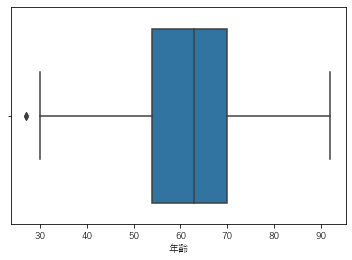

In [56]:
# Outliers on BMI
sns.boxplot(Resample_data['年齡'])

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


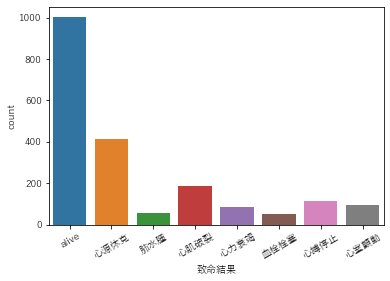

In [93]:
from sklearn.utils import resample
### first we concatnate x_tran and y_train
Resample_data = pd.concat([X_train_s, y_train_s], axis=1)
# separate minority and majority classes
Resample_data.columns=['年齡','性別','數量的心肌梗塞在病歷','病史中的勞力性心絞痛','上一年心絞痛功能等級','最近幾週（冠心病，冠心病）','存在原發性高血壓','有症狀的高血壓','動脈高血壓的持續時間','病史中存在慢性心力衰竭','觀察回憶中的心律失常','在病歷早產宮縮心房','病史中的室性早搏','病史中房顫的發作','持續形式的房顫（心房顫動）','心室顫動在病歷','病史中的室性陣發性心動過速','既往史中的一級 AV 阻滯','既往史中的三度 AV 阻滯','LBBB（前支）在病歷','病歷中的不完全','病史中的完全','不完全RBBB在病歷','在病歷（NP10）完整RBBB','糖尿病的既往病史','病史中的肥胖','甲狀腺毒症在病歷','在病歷慢性支氣管炎','在病歷31.Obstructive慢性支氣管炎','支氣管哮喘的既往史','慢性肺炎（zab_leg_04）','在既往病史（zab_leg_06）','重症監護室的收縮壓','重症監護室的舒張壓','入住重症監護病房時的肺水腫','入住重症監護病房時的心源性休克','入住重症監護病房時（或在院前階段）房顫發作 (MP_TP_POST)','入住重症監護病房時（或入院前階段）室上性心動過速的發作 (SVT_POST)','入住重症監護病房時（或在院前階段）室性心動過速的發作 (GT_POST)','心室顫動在入住重症監護病房時（或在院前階段）(FIB_G_POST)','存在前壁心肌梗塞（左心室）（V1：V4 導聯的心電圖變化）（ant_im）','存在側向心肌梗死（左心室）（ECG）導聯變化','存在下壁心肌梗死（左心室）（心電圖 III、AVF、II 導聯的變化）','存在後部心肌梗死（左心室）（V7 的心電圖變化：V9，導聯 V1 – V3 的交互變化）','右心室心肌梗塞 (IM_PG_P)','入院時的心電圖節律：竇性（心率 60-90）','ECG節律：心房纖維性顫動（ritm_ecg_p_02）','ECG節律：心房（ritm_ecg_p_04）','入院時心電圖節律：室性（ritm_ecg_p_06）','入院時心電圖節律心率高於 90 的竇（心動過速）','入院時心電圖心律：竇性心率低於 60（心動過緩','過早收縮 56入院時的心電圖 (n_r_ecg_p_01)','入院時心電圖頻繁出現房性早搏 (n_p2_g)ec','入院時心電圖上的室性早搏 (n_r_ecg_p_03)','入院時心電圖頻發室性早搏到醫院 (n_r_ecg_p_04)','入院時心電圖上的房顫發作 (n_r_5s_cg_)','入院時 ECG 上持續存在的房顫形式 (n_r_ecg_p_06)','陣發性心動過速的心室性心動過速 ECG','入院到醫院的時間（n_r_ecg_p_09）上ECG室性心動過速63發作','入院時心電圖上的心室顫動 (n_r_ecg_p_10)','入院時心電圖上的竇房阻滯 (n_p_ecg_p_01)','入院時心電圖一級房室傳導阻滯 (n_p_ecg_p_03)','1-6 度二度類型入院時心電圖顯示房室傳導阻滯（Mobitz I/Wenckebach）','入院時 (n_p_ecg_p_05) 心電圖顯示 2 型二度 AV 阻滯','入院時 ECG 上的 - 度 AV 阻滯 (n_p_ecg_p_06)','入院時 ECG 上的 LBBB（前支）到醫院 (n_p_ecg_p_07)','入院時心電圖上的 LBBB（後支）','不完全LBBB心電圖入院到醫院的時間（n_p_ecg_p_09）','入院時在 ECG 上完成 LBBB (n_p_ecg_p_10)','入院時 RBBB 不完整的 ECG醫院 (n_p_ecg_p_11)','入院時完成心電圖上的 RBBB (n_p_ecg_p_12)','溶栓治療（fibr_ter_01）','1米IU（fibr_ter_02）','溶栓治療（fibr_ter_03）','鏈蛋白酶 (fibr_ter_05) 的纖溶治療','IU溶栓治療（fibr_ter_06）','250k IU (fibr_ter_07) 的纖溶治療','纖溶治療由 1.5 breptionter_0 1.5 breptionter_0','低鉀血症 (<4 mmol/L) (GIPO_K)','血清鉀含量 (K_BLOOD) (mmol/L)','血清鈉增加（超過 150 mmol/L）（GIPER_Na）','血清鈉含量（Na_BLOOD）（mmol/L）','血清 AlAT 含量 (ALT_BLOOD) (IU/L)','血清 AsAT 含量 (AST_BLOOD) (IU/L)','白細胞計數（每升十億）（L_BLOOD）','ESR（紅細胞沉降率）（ROE）（Ð¼Ð¼','從CHD開始到醫院經過的時間（TIME_B_S）','入院前幾個小時疼痛復發期間（R_AB_1_n）','疼痛復發在住院期間的第二天（R_AB_2_n','第三天疼痛復發住院時間（R_AB_3_n）','ICU 中液態硝酸鹽的使用 (NITR_S)','住院最初幾個小時在 ICU 中使用阿片類藥物(NA_R_1_n)','住院第二天在 ICU 使用阿片類藥物（NA_R_2_n）','使用的阿片類藥物在醫院期間（NA_R_3_n）的第三天ICU','住院最初幾個小時在 ICU 中使用非甾體抗炎藥 (NOT_NA_1_n)','在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID','住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）','ICU 中利多卡因的使用 (LID_S_n)','在ICUβ受體阻滯劑（B_BLOK_S_n）','使用在ICU鈣通道阻滯劑（ANT_CA_S_n）','d°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途','ICU 中乙酰水楊酸的使用 (ASP_S_n)','在 ICU 中使用 Ticlid (TIKL_S_n)','在 ICU 中使用 Trental（TRENT_S_n）','心房纖顫（FIBR_PREDS）','室上速(PREDS_TAH)','室性心動過速 (JELUD_TAH)','心室顫動 (FIBR_JELUD)','三度房室傳導阻滯 (A_V_BLOK)','肺水腫 (OTEK_LANC)','心肌破裂 (RAZRIV)','德雷斯勒綜合徵（DRESSLER）','慢性心臟衰竭（ZSN）','復發的心肌梗死（REC_IM）','後梗死心絞痛 (P_IM_STEN)','致命結果']
alive = Resample_data[Resample_data.致命結果==0]
dead = Resample_data[Resample_data.致命結果>0]
# upsample minority
dead_upsampled = resample(dead,
                          replace=True, # sample with replacement
                          n_samples=len(alive), # match number in majority class
                          random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([alive, dead_upsampled])

# check new class counts
upsampled.致命結果.value_counts()
new_mort = sns.countplot(upsampled['致命結果'])
new_mort.set_xticklabels(['alive', '心源休克','肺水腫', '心肌破裂','心力衰竭', '血栓栓塞','心搏停止', '心室顫動'], rotation=30)
plt.show()

In [94]:
#new_mort.savefig('./csv/pic/target_original.png')
#new_mort.figure.savefig('./csv/pic/target_original.png')
new_mort.figure.savefig('./csv/pic/target_upsample.png', dpi=300)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


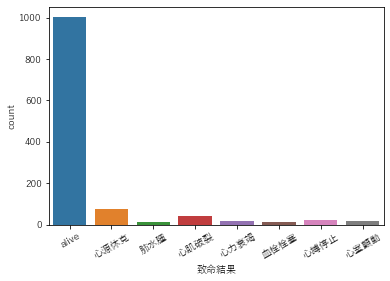

In [95]:
# check new class counts
upsampled.致命結果.value_counts()
new_mort = sns.countplot(Resample_data['致命結果'])
new_mort.set_xticklabels(['alive', '心源休克','肺水腫', '心肌破裂','心力衰竭', '血栓栓塞','心搏停止', '心室顫動'], rotation=30)
plt.show()

In [221]:
Resample_data.致命結果.value_counts()

0    1001
1      77
3      40
6      20
7      17
4      15
2      10
5      10
Name: 致命結果, dtype: int64

In [96]:
new_mort.figure.savefig('./csv/pic/target_original.png', dpi=300)

In [59]:
upsampled['致命結果'].value_counts()

0    1001
1     414
3     188
6     112
7      94
4      84
2      56
5      53
Name: 致命結果, dtype: int64

In [60]:
Resample_data['致命結果'].value_counts()

0    1001
1      77
3      40
6      20
7      17
4      15
2      10
5      10
Name: 致命結果, dtype: int64

In [61]:
y = upsampled['致命結果']
upsampled.drop(labels = '致命結果', axis = 1, inplace=True)
X = upsampled
X
train_data = np.array(X)#np.ndarray()
#train_data = train_data.tolist()
train_data_y = np.array(y)#np.ndarray()
#train_data_y = train_data_y.tolist()
print(type(train_data))
print(type(train_data_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [62]:
clf = XGBClassifier(
        #樹的個數
        n_estimators=15,
        # 如同學習率
        learning_rate= 0.3, 
        # 構建樹的深度，越大越容易過擬合    
        max_depth=15, 
        # 隨機取樣訓練樣本 訓練例項的子取樣比
        subsample=1, 
        # 用於控制是否後剪枝的引數,越大越保守，一般0.1、0.2這樣子
        gamma=0, 
        # 控制模型複雜度的權重值的L2正則化項引數，引數越大，模型越不容易過擬合。
        reg_lambda=1,  
        
        #最大增量步長，我們允許每個樹的權重估計。
        max_delta_step=0,
        # 生成樹時進行的列取樣 
        colsample_bytree=1, 

        # 這個引數預設是 1，是每個葉子裡面 h 的和至少是多少，對正負樣本不均衡時的 0-1 分類而言
        # 假設 h 在 0.01 附近，min_child_weight 為 1 意味著葉子節點中最少需要包含 100 個樣本。
        #這個引數非常影響結果，控制葉子節點中二階導的和的最小值，該引數值越小，越容易 overfitting。
        min_child_weight=1, 

        #隨機種子
        seed=1000 
        
        # L1 正則項引數
#        reg_alpha=0,
        
        #如果取值大於0的話，在類別樣本不平衡的情況下有助於快速收斂。平衡正負權重
        #scale_pos_weight=1,
        
        #多分類的問題 指定學習任務和相應的學習目標
        #objective= 'multi:softmax', 
        
        # 類別數，多分類與 multisoftmax 並用
        #num_class=10,
        
        # 設定成1則沒有執行資訊輸出，最好是設定為0.是否在執行升級時列印訊息。
#        silent=0 ,
        # cpu 執行緒數 預設最大
#        nthread=4,
    
        #eval_metric= 'auc'
)

# 模型 訓練
clf.fit(train_data,train_data_y,eval_metric='auc')
# 預測值
y_pred=clf.predict(X_test)
# 真實值 賦值
y_true= y_test

# 計算精度
print("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


Accuracy : 0.8882


In [63]:
# 計算精度
y_pred=clf.predict(train_data)# 計算精度
print("Accuracy : %.4g" % metrics.accuracy_score(train_data_y, y_pred))

Accuracy : 1


In [64]:
print(list(xgb_clf.predict(X_test)))
print(list(y_test))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 

In [65]:
# making predictions on the test data and confusion matrix
y_pred = xgb_clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Model Accuracy Score:', accuracy_score(y_test,y_pred))

[[426   2   0   0   0   0   0   0]
 [ 19  14   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0]
 [  0   0   0  14   0   0   0   0]
 [  8   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0]
 [  9   1   0   0   0   0   0   0]]
Model Accuracy Score: 0.8901960784313725
